In [2]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-17,45936.457031,47139.570313,44512.417969,44695.359375,44695.359375,33451362600
1,2021-08-18,44686.750000,45952.062500,44364.027344,44801.187500,44801.187500,32194123075
2,2021-08-19,44741.882813,46970.761719,43998.316406,46717.578125,46717.578125,37204312299
3,2021-08-20,46723.121094,49342.152344,46650.707031,49339.175781,49339.175781,34706867452
4,2021-08-21,49327.074219,49717.019531,48312.199219,48905.492188,48905.492188,40585205312


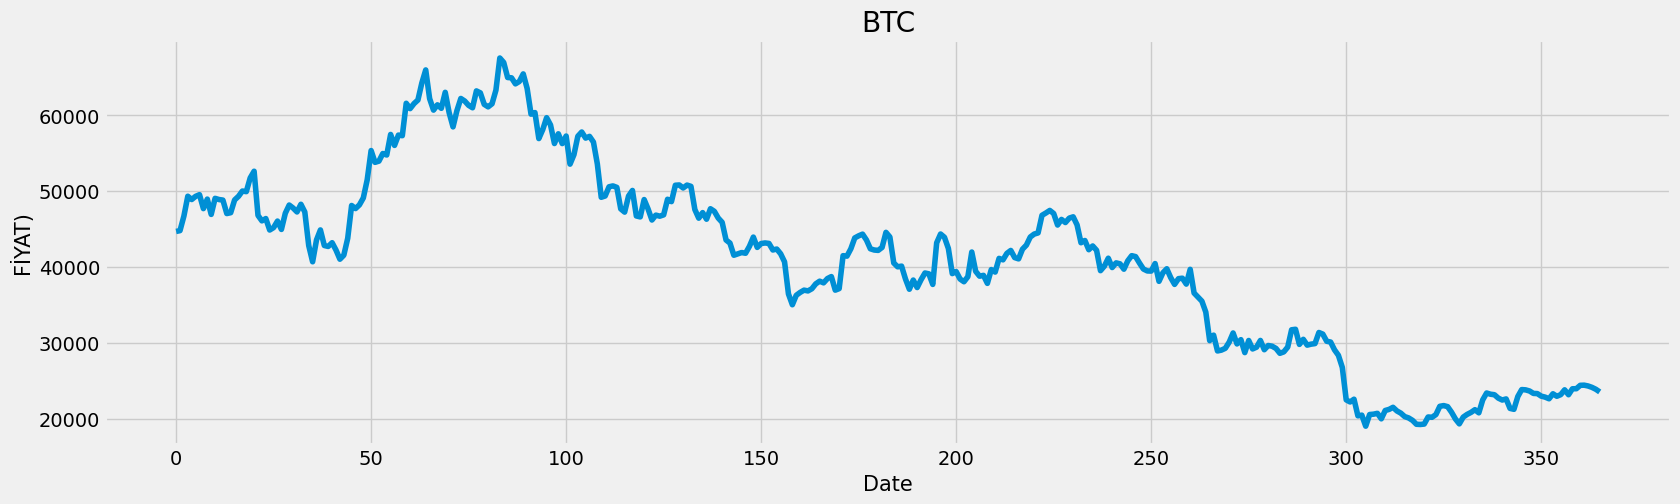

In [4]:
plt.figure(figsize=(18,5))
plt.title('BTC')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=15 )
plt.ylabel('FİYAT)', fontsize=15)
plt.show()

In [5]:
data = df.filter(['Close'])

In [6]:
dataset = data.values

In [7]:
from keras.engine import training
training_data_len = math.ceil(len(dataset)*0.85)
training_data_len

312

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.52890108],
       [0.5310809 ],
       [0.57055407],
       [0.62455287],
       [0.61562   ],
       [0.62419193],
       [0.62881602],
       [0.59091567],
       [0.61675899],
       [0.57518115],
       [0.61877506],
       [0.61555636],
       [0.61406158],
       [0.57750385],
       [0.57980468],
       [0.61441576],
       [0.62431696],
       [0.63868697],
       [0.63702371],
       [0.67428047],
       [0.69240899],
       [0.572481  ],
       [0.55765607],
       [0.56383601],
       [0.53278479],
       [0.53932551],
       [0.55707684],
       [0.53441538],
       [0.57827643],
       [0.60060132],
       [0.59250668],
       [0.58188158],
       [0.60270261],
       [0.5817312 ],
       [0.49076329],
       [0.44647573],
       [0.50581415],
       [0.53301523],
       [0.49067986],
       [0.48814313],
       [0.49827605],
       [0.47823846],
       [0.4534968 ],
       [0.46440986],
       [0.51027122],
       [0.59937769],
       [0.5910263 ],
       [0.601

In [9]:
train_data = scaled_data[0:training_data_len  , : ]

x_train=[]
y_train = []
for i in range(180,len(train_data)):
    x_train.append(train_data[i-180:i,0])
    y_train.append(train_data[i,0])

    if i<=180:
      print(x_train)
      print(y_train)
      print()

[array([0.52890108, 0.5310809 , 0.57055407, 0.62455287, 0.61562   ,
       0.62419193, 0.62881602, 0.59091567, 0.61675899, 0.57518115,
       0.61877506, 0.61555636, 0.61406158, 0.57750385, 0.57980468,
       0.61441576, 0.62431696, 0.63868697, 0.63702371, 0.67428047,
       0.69240899, 0.572481  , 0.55765607, 0.56383601, 0.53278479,
       0.53932551, 0.55707684, 0.53441538, 0.57827643, 0.60060132,
       0.59250668, 0.58188158, 0.60270261, 0.5817312 , 0.49076329,
       0.44647573, 0.50581415, 0.53301523, 0.49067986, 0.48814313,
       0.49827605, 0.47823846, 0.4534968 , 0.46440986, 0.51027122,
       0.59937769, 0.5910263 , 0.60108754, 0.61989217, 0.66936591,
       0.74859766, 0.71655871, 0.71989272, 0.74049811, 0.73644769,
       0.79233351, 0.76259603, 0.79060966, 0.78897062, 0.87697262,
       0.86251781, 0.87614188, 0.88587347, 0.93192809, 0.96757943,
       0.88966537, 0.85840004, 0.87284625, 0.86331404, 0.90675428,
       0.85163427, 0.81288169, 0.85695555, 0.89003187, 0.8830

In [10]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [11]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [12]:
model = Sequential()
model.add(LSTM(units = 50,return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

2022-08-18 21:21:55.332013: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-18 21:21:55.359714: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-18 21:21:55.359877: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-18 21:21:55.361069: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [13]:
model.compile(optimizer='adam',loss = 'mean_squared_error')

In [14]:
model.fit(x_train,y_train,batch_size = 1,epochs = 1)

2022-08-18 21:22:05.903143: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


132/132 [==============================] - 7s 20ms/step - loss: 0.0117


In [15]:
test_data = scaled_data[training_data_len - 180: , : ]

x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(180,len(test_data)):
    x_test.append(test_data[i-180:i,0])

In [16]:
test_data = scaled_data[training_data_len - 180: , : ]

x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(180,len(test_data)):
    x_test.append(test_data[i-180:i,0])

In [17]:
x_test = np.asarray(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [18]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 16ms/step


In [19]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1426.7161992226984

/tmp/ipykernel_628/1015417408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


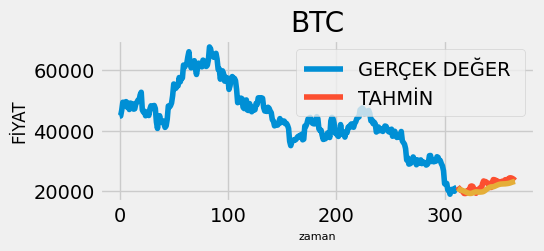

In [26]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


plt.figure(figsize=(5,2))
plt.title('BTC')
plt.xlabel('zaman', fontsize=8)
plt.ylabel('FİYAT', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend([ 'GERÇEK DEĞER ', 'TAHMİN'], loc='upper right')
plt.show()